In [22]:
# Michigan Hackers Machine Learning Team
# Project: Classifcation 
# Description: Binary Classifcation using Logistic Regression
# Author: Rajas Gupta
# Date: October 1st 2020

In [23]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
# maps X to a power+1 dimension such that x => [1, x]
def offset(X):
    Phi = np.array([[1, x[0], x[1]] for x in X])
    return Phi

In [25]:
# sigmoid/logistic function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [26]:
# returns probabolity that label is 1
def predict(X, theta):
    z = np.array(np.dot(X, theta),dtype=np.float32)
    return sigmoid(z)

In [27]:
# returns logsitc cost between predicted and true labels
def cost_function(X, theta, y, lamda):
    n = len(X) # number of data points
    y_pred = predict(X, theta) # Find predicted labels
    cost_pos = -y * np.log(y_pred) # Error for positive class (y = 1)
    cost_neg = -(1 - y) * np.log(1 - y_pred) # Error for negative class (y = 0)
    cost = cost_pos + cost_neg # Sum costs os postive and negative class
    cost = 1/n * cost.sum() # Take the average cost
    cost += lamda/(2*n) * (theta**2).sum() # regularize
    return cost

In [28]:
# Gradient Descent Function
# Inputs: empirical data (X and Y), learning rate (L), and max iterations (epochs)
# Outputs: (coefficitents for the equation of the hyperplane) theta
def GD(X,Y,L,epochs, lamda):
    theta = np.zeros(X.shape[1]) # hyperplane coefficients
    n = len(X) # number of datapoints
    for i in range(epochs):
        Y_pred = predict(X, theta) # y* values
        Y_delta = Y_pred - Y # difference between predicted and true y values
        gradient = 2*np.dot(Y_delta, X)/n + lamda*theta.sum()/n # according to regularized cost function
        theta = theta - L*gradient # update slope with learning rate
    return theta

In [38]:
dataset = pd.read_csv('exam.csv') # Import Dataset
X = np.array(dataset[['Midterm', 'Final']], dtype=np.float32)
y = np.array(dataset['Pass'])
X = offset(X) # offset x to include constant parameter
theta = GD(X,y,10**0,10**7, 10**-7)
print(cost_function(X, theta, y, 10**-7))
print(theta)

<ipython-input-25-8ba521874efc>:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))


nan
[-11307.17346015     88.22768177     87.58516973]


<ipython-input-27-c5cf0aaa427c>:5: RuntimeWarning: divide by zero encountered in log
  cost_pos = -y * np.log(y_pred) # Error for positive class (y = 1)
<ipython-input-27-c5cf0aaa427c>:5: RuntimeWarning: invalid value encountered in multiply
  cost_pos = -y * np.log(y_pred) # Error for positive class (y = 1)
<ipython-input-27-c5cf0aaa427c>:6: RuntimeWarning: divide by zero encountered in log
  cost_neg = -(1 - y) * np.log(1 - y_pred) # Error for negative class (y = 0)
<ipython-input-27-c5cf0aaa427c>:6: RuntimeWarning: invalid value encountered in multiply
  cost_neg = -(1 - y) * np.log(1 - y_pred) # Error for negative class (y = 0)


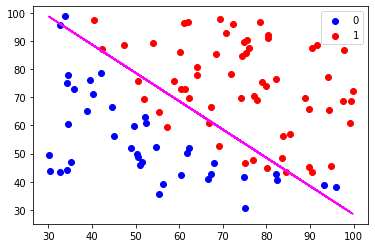

In [39]:
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='b', label='0')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='r', label='1')
plt.legend()
x2 = (theta[0] + theta[1] * X[:, 1]) / (-1 * theta[2])
plt.plot(X[:, 1], x2, c = 'magenta')